# NbO2 I-V Curves

March 22 2022

Re-used the Mag Multipole code to try and make graphs of the I-V Curves for the NbO2 project.

In [2]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

max current starts at: 2306
index of the beginning of the jump: 3660


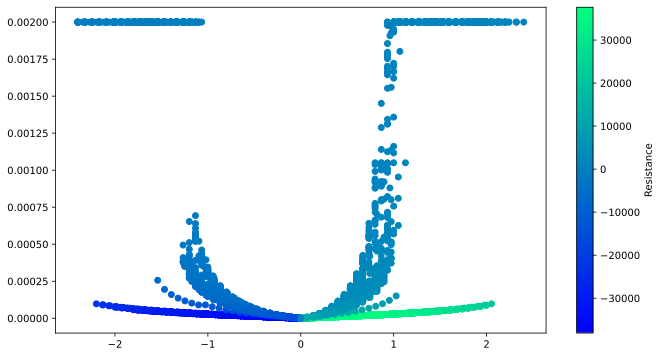

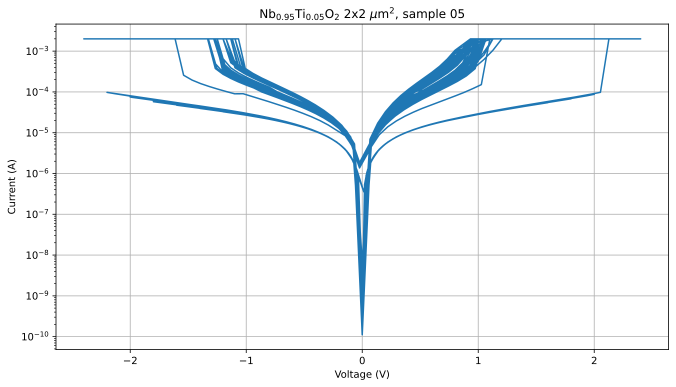

In [39]:
# Making the first graphs
basePath = r'C:\Users\Ted Mburu\NbO2'
fileName = r'IVNb0p95Ti0p05O2_24-05162022-05.txt'

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

NbPercentage = str(int(find_between(fileName, "IVNb", "Ti").split('p')[1]) / 100)
TiPercentage = str(int(find_between(fileName, "Ti", "O2").split('p')[1]) / 100)
sampleNumber = find_between(fileName, "-", ".txt").split('-')[1]


filePath = ''
if (NbPercentage  == "0.95"):
    filePath = basePath + r'\Doping05\ '.rstrip() + fileName
elif (NbPercentage  == "0.90"):
    filePath = basePath + r'\Doping10\ '.rstrip() + fileName
else: 
    filePath = basePath + r'\Doping0\ '.rstrip() + fileName
    
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
#df5 = pd.read_csv(r'e:\Google Drive\RawData\IVNb0p100Ti0p00O2_02-04262022-16.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]







def plot_gradient_hack( p0, p1, npts=20, cmap=None, **kw):
    """
    Draw a gradient between p0 and p1 using a colormap
    The **kw dictionary gets passed to plt.plot, so things like linestyle,
    linewidth, labels, etc can be modified directly.
    """
    x_1, y_1 = p0
    x_2, y_2 = p1
    
    X = np.linspace(x_1, x_2, npts)
    Xs = X[:-1]
    Xf = X[1:]
    Xpairs = zip(Xs, Xf)
    
    Y = np.linspace(y_1, y_2, npts)
    Ys = Y[:-1]
    Yf = Y[1:]
    Ypairs = zip(Ys, Yf)

    C = np.linspace(0,1, npts)
    cmap = plt.get_cmap(cmap)
    # the simplest way of doing this is to just do the following:
    for x, y, c in zip(Xpairs, Ypairs, C):
        plt.plot(x, y, '-', c=cmap(c), **kw)

    # But for cases when that  will be too slow, you can make this go faster,
    # follow along with this example:
    # http://matplotlib.org/examples/pylab_examples/line_collection2.html

def plot_gradient_rbg_pairs(p0, p1, rgb0, rgb1, **kw):
    """Form the gradient from RGB values at each point
    The **kw dictionary gets passed to plt.plot, so things like linestyle,
    linewidth, labels, etc can be modified directly.
    """
    cmap = LinearSegmentedColormap.from_list('tmp', (rgb0, rgb1))
    plot_gradient_hack(p0, p1, cmap=cmap, **kw)

# # plot gradient that just spans the full colormap
# plot_gradient_hack( (1,2), (5,6) )


# plt.scatter(V, I,c=t,cmap='winter')
# plt.colorbar(label='time')

plt.scatter(V, I,c=V/I,cmap='winter')
plt.colorbar(label='Resistance')


slopes = np.absolute(np.divide(V, I))


largestCurrent = np.amax(I)
maxCurrentThreshhold = largestCurrent * 0.95;
indexOfFirstLargeCurrent = np.argmax(I > maxCurrentThreshhold)
print("max current starts at: " + str(indexOfFirstLargeCurrent))

reversedCurrentArray = I[::-1]
reversedSlopeArray = slopes[::-1]

index = np.size(I) - indexOfFirstLargeCurrent 
previousSlope = slopes[index - 1]

while index >= 0 :
    if np.abs(previousSlope - reversedSlopeArray[index]) > previousSlope * 0.1:
        print("index of the beginning of the jump: " + str(index))
        index = 0
    previousSlope = reversedSlopeArray[index]
    index -= 1

# print(np.size(V))
# print(np.size(slopes))


# plt.scatter(t, I, V=V, marker='_')

plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(V,I)
#plt.xlim([-0.75,-0.7])
#plt.ylim([0,125])
plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);


I0_d=I
V0_d=V

The average resistance is 37.4 kiloohms
The standard deviation is 0.2 kiloohms
The average resistance is 7.6 kiloohms
The standard deviation is 3.1 kiloohms


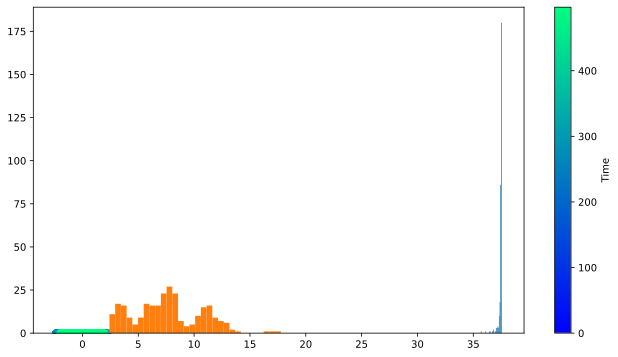

In [19]:
absoluteValueVoltage = np.abs(V)
R = absoluteValueVoltage / I
Vset  = 0.5
Vdist = 0.1

Rcut = R[(absoluteValueVoltage > (Vset-Vdist) ) & (absoluteValueVoltage < (Vset+Vdist) )]/1e3
#print(Rcut)

Rth = 20
Rcut2 = Rcut[Rcut>Rth]
plt.hist(Rcut2,bins=30)
#plt.xlim([0,5])

print('The average resistance is', "{:.1f}".format(np.mean(Rcut2)), 'kiloohms'  ) 
print('The standard deviation is', "{:.1f}".format(np.std(Rcut2)), 'kiloohms'  ) 


Rth = 20
Rcut2 = Rcut[Rcut<Rth]
plt.hist(Rcut2,bins=30)

print('The average resistance is', "{:.1f}".format(np.mean(Rcut2)), 'kiloohms'  ) 
print('The standard deviation is', "{:.1f}".format(np.std(Rcut2)), 'kiloohms'  ) 



In [ ]:
Icut = np.log10(I[I>1e-7])
Vcut3 = V[I>1e-7]

diff = np.abs(Icut[1:]-Icut[:-1])
diff = np.append(diff,0)


plt.plot(Icut[:-1],'.')
plt.plot(Vcut3[:-1],'.')
plt.plot(diff)
print(Vcut3[diff>1])

plt.xlim([0,3000])

In [ ]:
# Making the first graphs

#df5 = pd.read_csv(r'e:\Google Drive\Data\NbO2\Doping0\IVcurveNbO2_updoped-01042022-12.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]


plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(V,I)
#plt.xlim([60,80])
#plt.ylim([0,125])
plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');
#plt.title(r'NbO$_2$, 2$\times$2 $\mu$m$^2$, sample 12');


I0_b=I
V0_b=V

In [ ]:
plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(t,I)
#plt.xlim([-0.75,-0.7])
#plt.ylim([0,125])
plt.xlabel('Time (s)');
plt.ylabel('Current (A)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);

In [ ]:
plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(t,V)
#plt.xlim([-0.75,-0.7])
#plt.ylim([0,125])
plt.xlabel('Time (s)');
plt.ylabel('Voltage (V)');

nb = 'Nb' if NbPercentage == "1.0" else r'Nb$_{'+ NbPercentage +'}$'
ti = '' if TiPercentage == "0.0" else r'Ti$_{'+ TiPercentage +'}$'
sample = ' sample ' + sampleNumber

title = nb + ti + r'O$_2$ 2x2 $\mu$m$^2$,' + sample
plt.title(title);

In [ ]:
# Making the first graphs

#df5 = pd.read_csv(r'e:\Google Drive\Data\NbO2\Doping0\IVcurveNbO2_updoped-01042022-12.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
df5 = pd.read_csv(r'e:\Google Drive\RawData\IVNb0p100Ti0p00O2_02-04262022-07a.txt', names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data=df5.values
df5.head()

t= data[:,0]
I= data[:,1]
V= data[:,2]


plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
plt.figure(0)
plt.grid()
plt.semilogy(V,I)
#plt.xlim([60,80])
#plt.ylim([0,125])
plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');
#plt.title(r'NbO$_2$, 2$\times$2 $\mu$m$^2$, sample 12');


I0_c=I
V0_c=V

In [ ]:
plt.semilogy(V0_b, I0_b, V0_c, I0_c,V0_d, I0_d)

In [ ]:
plt.semilogy(V0_c, I0_c,V0_d, I0_d)